# Parcial 2 - Ciencia de Datos Aplicada
- María Catalina Ibáñez Piñeres - 201922462

## 1. Evaluación cuantitativa
Utilizando la primera versión del modelo de clasificación adjunta en el parcial, calcule la matriz de confusión, la exactitud, precisión, recall y f1-score de este usando el conjunto de datos de validación. Explique qué implicaciones tienen sus resultados con relación al valor de exactitud que conoce la junta directiva; y recomiende alguna de las medidas obtenidas según el contexto para medir de forma más apropiada el rendimiento del modelo. Justifique su respuesta.

In [6]:
%pip install joblib
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 48.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 74.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 62.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ----------------- ---------------------- 19.7/44.5 MB 103.2 MB/s eta 0:00:01
   --------------------------------- ------ 37.7/44.5 MB 92.1 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 90.8 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 70.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import joblib

In [4]:
# Cargar modelo
model = joblib.load('clasificador_base.joblib')

In [14]:
# Cargamos los datos de test
test = pd.read_csv("diabetes_data_test.csv")

In [15]:
test.columns

Index(['Unnamed: 0', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [16]:
def dummy_encoding(col, dataframe):
    enc_df = pd.get_dummies(dataframe[col], columns=dataframe[col].unique(), drop_first=True, dtype=int, prefix=f"{col}_")
    dataframe = dataframe.join(enc_df)
    return dataframe, enc_df.columns


def diag_cluster(col, dataframe):
    diag_list = []
    for x in dataframe[col]:
        # Si la columna contiene 'V' o 'E' entonces se le asigna el valor 18
        if 'V' in x or 'E' in x: 
            diag_list.append(18)
            continue
        # En todos los demás casos, se le asigna el valor indicado según el rango.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)
    dataframe[col] = diag_list

In [17]:
diag_cluster('diag_1',test)
diag_cluster('diag_2',test)
diag_cluster('diag_3',test)

test, cols_race = dummy_encoding('race', test)
test, cols_diag_1 = dummy_encoding('diag_1', test)
test, cols_diag_2 = dummy_encoding('diag_2', test)
test, cols_diag_3 = dummy_encoding('diag_3', test)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)


In [10]:
X_test=test[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_test=test['readmitted']

In [11]:
y_pred = model.predict(X_test)

Se calcula la matriz de confusión

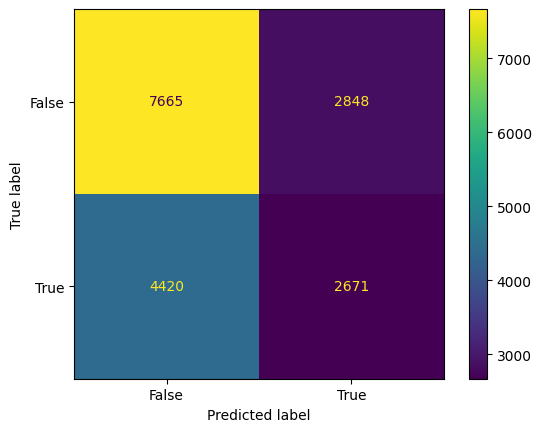

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

Se calcula la precisión, el recall, el f1-score y la exactitud

In [12]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.4839644863199855
Recall: 0.3766746580172049
F1-Score: 0.42363203806502775
Accuracy: 0.5871392865257896


**Qué implicaciones tienen sus resultados con relación al valor de exactitud que conoce la junta directiva?**

Se puede observar que con los datos de prueba, la exactitud es igual a 58.71%. Esto quiere decir que de cada 100 pacientes, aproximadamente 58 son clasificados correctamente. Lo que quiere decir que el desempeño del modelo no es tan bueno como lo piensa la junta directiva. Como se puede ver entre los datos de entrenamiento y los de prueba hubo una disminución significativa de la exactitud (del 80% al 58.71%) lo que sugiere que el modelo está sobreajustado, es decir, el modelo no aprendió a generalizar bien los datos de entrenamiento. 

Es necesario mejorar el modelo para evitar el sobreajuste, posibles sugerencias para mitigar esta problemática serían:
- Simplificar el modelo: usar un modelo menos complejo con menos parámetros.
- Regularización: aplicar técnicas de regularización como L1 o L2 para penalizar coeficientes grandes.
- Incrementar los datos de entrenamiento

**Recomiende alguna de las medidas obtenidas según el contexto para medir de forma más apropiada el rendimiento del modelo**

Se recomienda basarse de la métrica recall. Esto es porque el recall mide la proporción de casos que son positivos que son clasificados correctamente por el modelo. Lo anterior es importante porque garntizar que los pacientes en riesgo de ser readmitidos sean correctamente identificados es crucial para tomar medidas preventivas. Es decir, es mejor identificar incorrectamente un paciente que no será readmitido como que será readmitido a identificar a uno que será readmitido como que no será readmitido. Si esto se da, se reduciría la cantidad de pacientes readmitidos y por ende se disminuirían los costos de las facturas médica de los pacientes, disminuten la carga financiera sobre la clínica y evitan la pérdida de confianza en la institución de salud. 

Cabe aclarar que la precisión y el f1-score también son importantes y no se deben descuidar, pero se la recomendación es darle prioridad al recall,



## 2. Interpretabilidad
Explique cómo funciona el modelo de clasificación propuesto, concentrándose en el funcionamiento global y la importancia de los atributos. (Ayuda: puede simplificar el modelo usando técnicas de post-pruning).

In [17]:
train = pd.read_csv("diabetes_data_train.csv")

In [18]:
diag_cluster('diag_1',train)
diag_cluster('diag_2',train)
diag_cluster('diag_3',train)

train, cols_race = dummy_encoding('race', train)
train, cols_diag_1 = dummy_encoding('diag_1', train)
train, cols_diag_2 = dummy_encoding('diag_2', train)
train, cols_diag_3 = dummy_encoding('diag_3', train)

extra_cols = list(cols_race)+list(cols_diag_1)+list(cols_diag_2)+list(cols_diag_3)

In [19]:
X_train=train[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_train=train['readmitted']

In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Supongamos que model es un RandomForestClassifier ya entrenado
# y X_train contiene los datos de entrenamiento

# Obtener la importancia de los atributos
importances = model.feature_importances_

# Ordenar los atributos por importancia
indices = np.argsort(importances)[::-1]

# Imprimir la importancia de los atributos
for i in range(X_train.shape[1]):
    print(f"Atributo {i + 1} ({X_train.columns[indices[i]]}): {importances[indices[i]]:.4f}")

Atributo 1 (num_lab_procedures): 0.1444
Atributo 2 (num_medications): 0.1098
Atributo 3 (time_in_hospital): 0.0747
Atributo 4 (discharge_disposition_id): 0.0667
Atributo 5 (number_inpatient): 0.0496
Atributo 6 (age): 0.0485
Atributo 7 (number_diagnoses): 0.0453
Atributo 8 (num_procedures): 0.0436
Atributo 9 (admission_type_id): 0.0289
Atributo 10 (admission_source_id): 0.0271
Atributo 11 (gender): 0.0208
Atributo 12 (number_outpatient): 0.0195
Atributo 13 (diag_1__7): 0.0172
Atributo 14 (race__Caucasian): 0.0162
Atributo 15 (diag_2__7): 0.0162
Atributo 16 (metformin): 0.0148
Atributo 17 (diag_3__7): 0.0145
Atributo 18 (diag_2__3): 0.0138
Atributo 19 (diag_3__3): 0.0137
Atributo 20 (change): 0.0134
Atributo 21 (insulin): 0.0134
Atributo 22 (number_emergency): 0.0129
Atributo 23 (glipizide): 0.0120
Atributo 24 (diabetesMed): 0.0104
Atributo 25 (diag_2__8): 0.0078
Atributo 26 (diag_1__3): 0.0076
Atributo 27 (diag_1__9): 0.0070
Atributo 28 (glyburide): 0.0064
Atributo 29 (glimepiride): 0.0

In [22]:
# train a new model with the most important features
X_train_important = X_train.iloc[:, indices[:5]]
X_test_important = X_test.iloc[:, indices[:5]]

model_important = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=3, random_state = 2)
model_important.fit(X_train_important, y_train)

y_pred_important = model_important.predict(X_test_important)

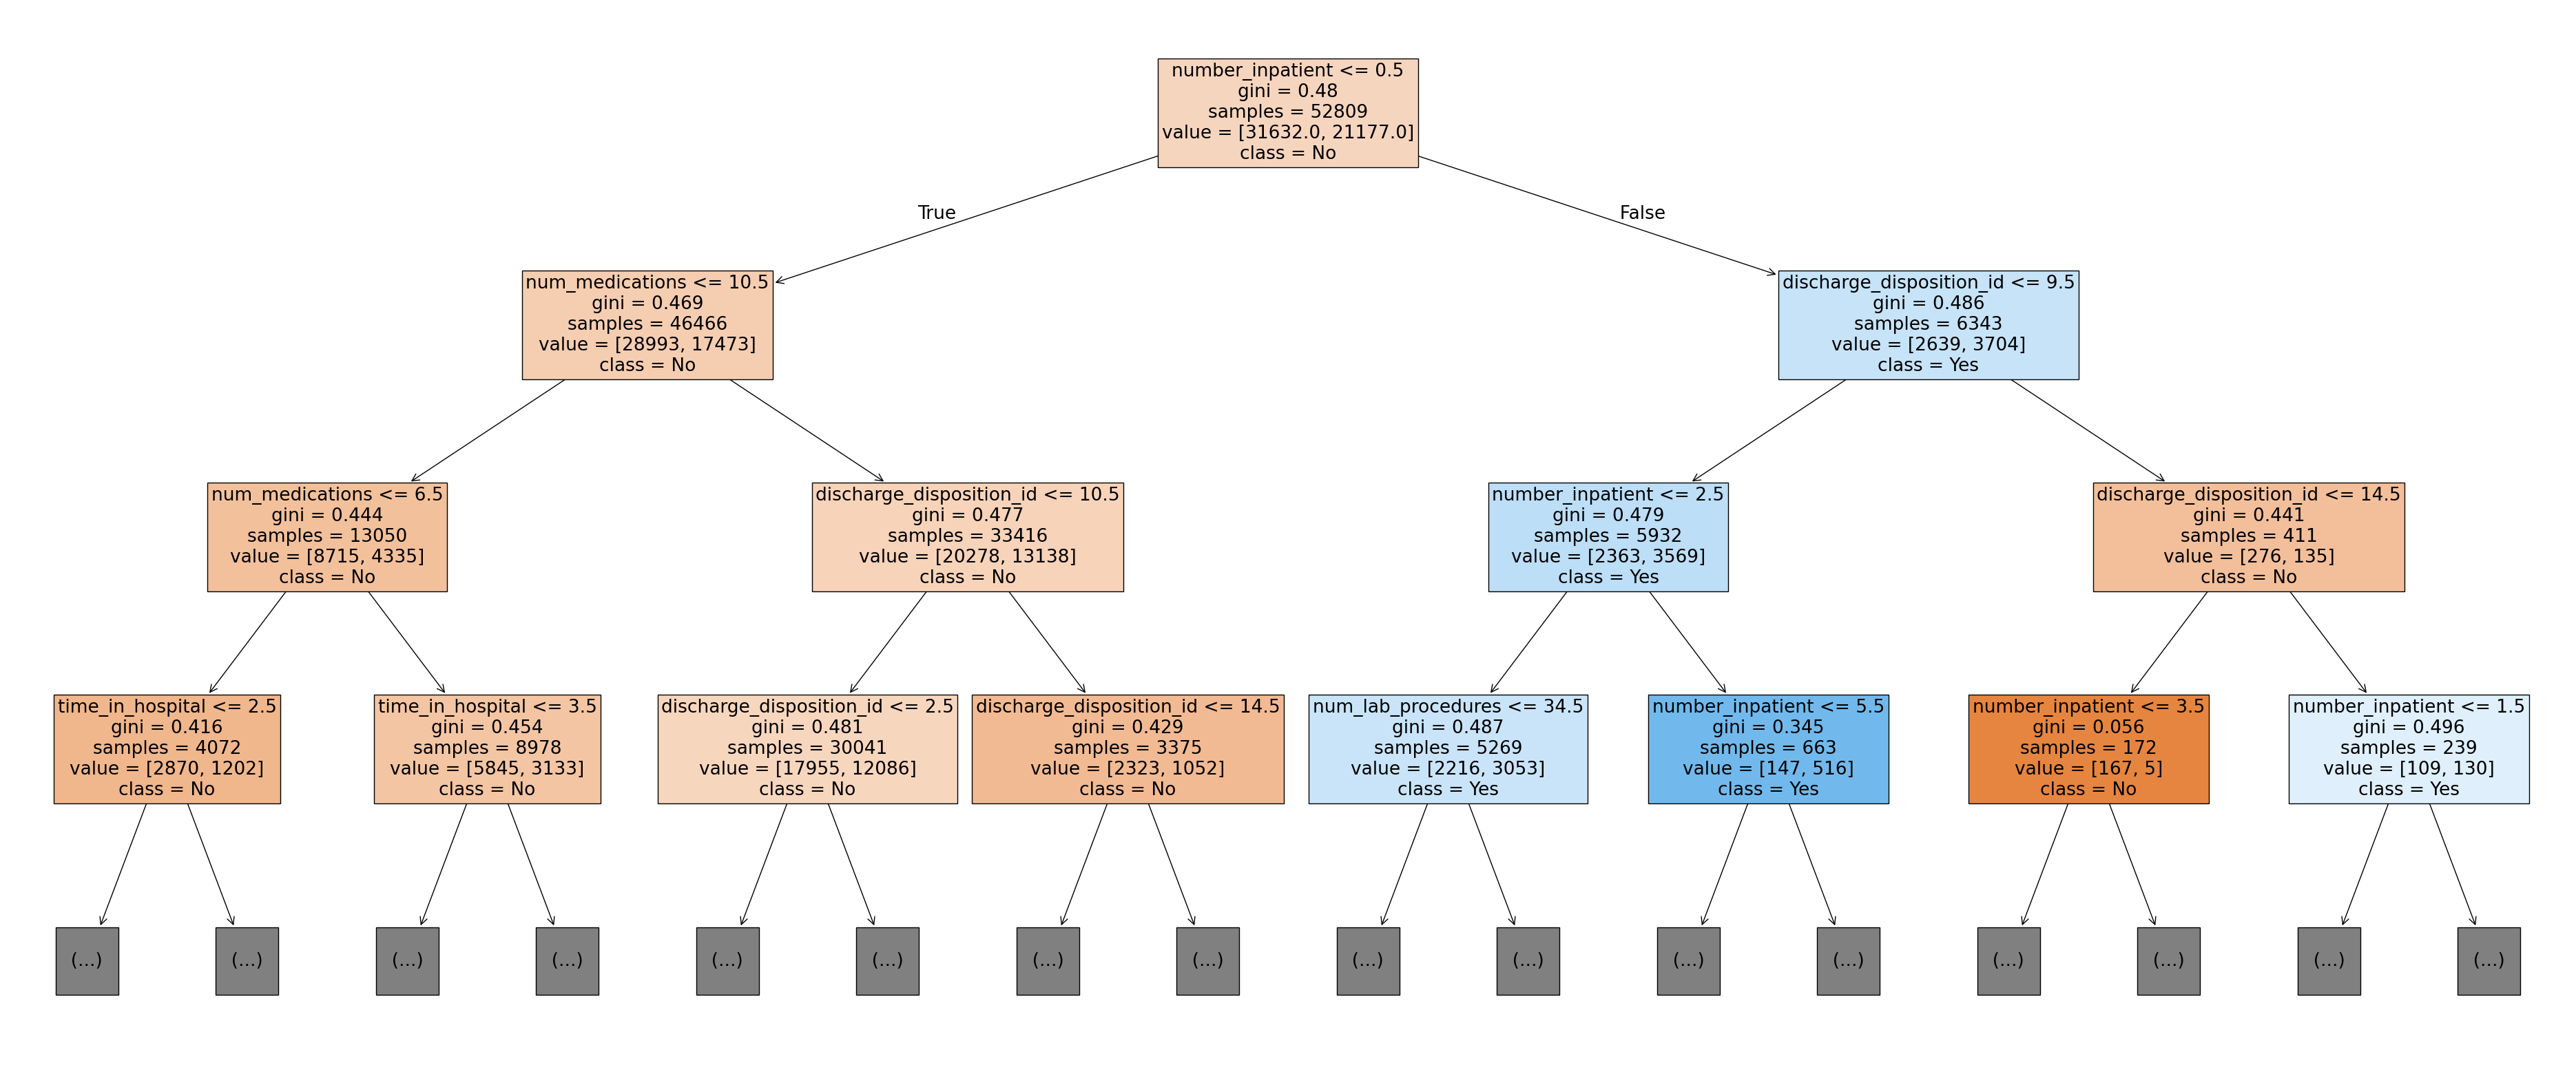

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree with only 3 levels and adjust the figure size and font size
plt.figure(figsize=(48,20))  # Increase the figure size for better visibility
plot_tree(model_important, 
          filled=True, 
          feature_names=X_train_important.columns, 
          class_names=['No', 'Yes'], 
          max_depth=3, 
          fontsize=19)  # Adjust the font size for better readability
plt.show()

**Cómo funciona el modelo a nivel global**

El modelo de clasificación usado es un árbol de decisión, este es un modelo de aprendizaje supervisado usado para clasifiar datos en categorías. En este caso específico el árbol se construye a partir de una serie de divisiones recursivas el conjunto de datos de entrenamiento. En cada nodo del árbol, se selecciona el atributo que mejor separa los datos en función de una métrica de impureza, en este caso, `gini`. El atributo que se selecciona para dividir los datos es el que proporciona la mayor reducción de esta impureza, es decir, el atributo que mejor separa las clases en el punto que se está analizando del árbol. El crecimiento del árbol continua hasta que se cumplen diferentes criterios de parada como alcanzar la máxima profundidad profundidad del árbol (en este caso 20), un número mínimo de muestras en una hoja (en este caso 3) o el mínimo número de muestras que se debe tener para hacer una división (en este caso, 2).

Para hacer una predicción, el modelo recorre desde la raíz hasta una hoja del árbol siguiendo las divisiones basadas en los valores de los atributos de ejemplo. La clase asignada es la clase mayoritaria en la hoja en la que termina el recorrido.

**Importancia de los atributos**

La importancia de un atributo se calcula como la suma de las reducciones de impureza que el atributo proporciona en todos los nodos donde se usa para dividir los datos. Luego, estas reducciones se normalizan para que la suma de las importancias de todos los atributos sea 1. Los atributos con mayor importancia son aquellos que más contribuyen a la toma de decisiones en el árbol, es decir, son los que tienen mayor impacto en la predicción de la clase.

Se volvió a entrenar el modelo pero solo con los 10 atributos más importantes (post-pruning) y si imprimimos el árbol de decisión hasta una profundidad de 3 podemos hacer una interpretación inicial del modelo. Como se puede observar, se clasifica a un paciente como que será readmitido si `number_inpatient` es mayor a 0.5 y si el `discharge_disposition_id` es menor o igual a 9.5 o por otro lado si si `number_inpatient` es mayor a 0.5 y el `discharge_disposition_id` es mayor de 14.5 (hasta la profundidad 3). 

Por otro lado, se puede ver que las variables con mayor importancia, es decir, las que minimizan la impureza e influyen más sobre la predicción en el modelo original son:
- Atributo 1 (num_lab_procedures): 0.1444
- Atributo 2 (num_medications): 0.1098
- Atributo 3 (time_in_hospital): 0.0747
- Atributo 4 (discharge_disposition_id): 0.0667
- Atributo 5 (number_inpatient): 0.0496
- Atributo 6 (age): 0.0485
- Atributo 7 (number_diagnoses): 0.0453
- Atributo 8 (num_procedures): 0.0436
- Atributo 9 (admission_type_id): 0.0289
- Atributo 10 (admission_source_id): 0.0271

## 3. Justicia
Determine si el modelo de clasificación propuesto inicialmente es justo usando alguna medida de justicia (fairness) con relación al atributo sensible género (gender).

In [36]:
datos_g1 = test[test["gender"]==0]
datos_g2 = test[test["gender"]==1]

In [43]:
len(datos_g1), len(datos_g2)

(9273, 8331)

In [44]:
# Se ponen ambos datos en la misma longitud
datos_g1 = datos_g1.sample(len(datos_g2), random_state=42)

In [45]:
len(datos_g1), len(datos_g2)

(8331, 8331)

In [46]:
# se divide en atributos y variable objetivo
X_test_g1=datos_g1[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_test_g1=datos_g1['readmitted']

X_test_g2=datos_g2[['num_lab_procedures', 'num_medications', 'age', 'gender', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']+extra_cols]
y_test_g2=datos_g2['readmitted']

In [47]:
ypred_g1=model.predict(X_test_g1)
ypred_g2=model.predict(X_test_g2)

In [48]:
acc_g1 = (ypred_g1==y_test_g1).astype(int)
acc_g2 = (ypred_g2==y_test_g2).astype(int)

print(acc_g1.mean())
print(acc_g2.mean())

0.5812027367662945
0.5928459968791262


In [49]:
from scipy import stats


t_stat, p_value = stats.ttest_rel(acc_g1, acc_g2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.5151880878869, P-value: 0.12976272140347703


**Conclusión**

El modelo sí es justo debido a que no hay una diferencia estadísticamente significativa en la exactitud entre los grupos (p-value es mayor a 0.05). Es decir, la diferencia en exactitud no es significativa como para que sea un factor o atributo determinante dentro de la predicción de readmisión, el modelo cumple con el criterio de igualdad de resultados.

## 4. Mejoramiento continuo y A/B testing
Diseñe e implemente una segunda versión del modelo de clasificación que mejore el modelo con el propósito de mejorarla. Describa por qué su implementación debería ver una mejora, y valide si el modelo es efectivamente mejor que la primera versión con relación a la métrica más importante del mismo recomendada en el punto 1 usando A/B testing.


In [51]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
# Segunda versión 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Define pipeline parameters
parameter = {
    "classifier__criterion": ["gini","entropy"],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__max_depth": [10, 20, 30]
}

# Create pipeline with SMOTE
pipe = ImbPipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])

# Create grid search
grid_pipeline = GridSearchCV(pipe, param_grid=parameter, cv=3, verbose=2, scoring="recall")

# Fit grid search
grid_pipeline.fit(X_train, y_train)

# Get best estimator and parameters
best_model = grid_pipeline.best_estimator_
best_params = grid_pipeline.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=2; total time=   0.2s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=2; total time=   0.2s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=10; total time=   0.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__min_samples_split=10; total time=   0.1s
[CV] END classifi

In [54]:
best_model

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=30))])

In [55]:
best_params

{'classifier__criterion': 'gini',
 'classifier__max_depth': 30,
 'classifier__min_samples_split': 2}

**Por qué se debería ver una mejora?**

Se debería ver una mejor con respecto al modelo original por dos razones principales:
- Optimización de hiperparámetros: al usar GridSearch se están buscando los mejores hiperparámetros para el modelo de árbol de decisión. En lugar, de usar parámetros fijos. Esto a su vez hace que sea más probable que el modelo tenga un mejor rendimiento.
- Se usa validación cruzada lo que asegura que el rendimiento del modelo se evalue de manera más robusta. La validación cruzada divide los datos en múltiples pliegues y entrena/evalúa el modelo en diferentes subconjuntos de datos, lo que ayuda a reducir el riesgo de sobreajuste y proporciona una estimación más confiable del rendimiento del modelo.

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score

xtestA, xtestB, ytestA, ytestB = train_test_split(X_test, y_test, test_size=0.5)

In [71]:
ypred_control=model.predict(xtestA)
ypred_variant=best_model.predict(xtestB)

In [72]:
recall_control = recall_score(ytestA, ypred_control)
recall_variant = recall_score(ytestB, ypred_variant)

print(f"Recall del modelo A: {recall_control:.4f}")
print(f"Recall del modelo B: {recall_variant:.4f}")

Recall del modelo A: 0.3869
Recall del modelo B: 0.4417


In [75]:
# Validación cruzada
recall_a_cv = cross_val_score(model, xtestA, ytestA, cv=5, scoring='recall')
recall_b_cv = cross_val_score(best_model, xtestB, ytestB, cv=5, scoring='recall')

print(f"Recall promedio del Modelo A: {recall_a_cv.mean()}")
print(f"Recall promedio del Modelo B: {recall_b_cv.mean()}")

# Prueba t para comparar los resultados
t_stat, p_value = stats.ttest_ind(recall_a_cv, recall_b_cv)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Recall promedio del Modelo A: 0.39806219035890933
Recall promedio del Modelo B: 0.4656845328533695
T-statistic: -3.405338886651435
P-value: 0.00928688393023937


In [76]:
# Evaluar si la diferencia es estadísticamente significativa
alpha = 0.05
if p_value > alpha:
    print("No hay una diferencia estadísticamente significativa en el recall entre los modelos.")
else:
    print("Hay una diferencia estadísticamente significativa en el recall entre los modelos.")

Hay una diferencia estadísticamente significativa en el recall entre los modelos.


**Conclusión**

Después de realizar el A/B testing para comparar el rendimiento de los dos modelos de clasificación en términos de recall, hemos obtenido los siguientes resultados:

- Recall Promedio del Modelo A: 0.39
- Recall Promedio del Modelo B: 0.46
- Valor p del Test T: 0.009 (Menor a 0.05)

Estos resultados indican que el modelo B (la implementación mejorada propuesta) tiene un recall promedio significativamente mayor que el modelo A. El valor p de 0.009 (menor a 0.05) sugiere que la diferencia en el recall entre los dos modelos es estadísticamente significativa.

## 5. Despliegue de modelos

Describa que estrategia de despliegue del modelo le conviene a la organización para validar con datos generados en tiempo real en el hospital teniendo en cuenta las restricciones indicadas en el contexto. 

**Estrategia de despliegue**

Para validar el modelo con datos generados en tiempo real en el hospital, es importante implementar una estrategia de despliegue que permita evaluar el rendimiento del modelo sin afectar negativamente el bienestar de los pacientes ni generar malestar entre el personal de salud. 

Una posible estrategia de despliegue es la prueba en paralelo (Shadow Deployment)

1. Despliegue en paralelo:
    - Modelo actual: Mantener el modelo actual en producción, que ya está siendo utilizado por el personal de salud.
    - Modelo nuevo: Desplegar el nuevo modelo en paralelo, pero sin que sus predicciones afecten las decisiones clínicas. Este modelo funcionará en modo "sombra", donde procesará los mismos datos en tiempo real que el modelo actual, pero sus resultados no serán visibles para el personal de salud.

2. Recolección de datos:
    - Predicciones del modelo actual: Continuar recolectando las predicciones y resultados del modelo actual.
    - Predicciones del modelo nuevo: Recolectar las predicciones del nuevo modelo en paralelo.

3. Evaluación y comparación:
    - Métricas de rendimiento: Evaluar y comparar las métricas de rendimiento (como el recall, precisión, F1-score, etc.) de ambos modelos utilizando los datos recolectados en tiempo real.
    - Análisis de impacto: Analizar el impacto potencial de las predicciones del nuevo modelo en comparación con el modelo actual. Esto incluye evaluar si el nuevo modelo mejora la detección de pacientes con alto riesgo de reingreso sin aumentar significativamente las falsas alarmas.

4. Pruebas estadísticas:
    - Pruebas de significancia: Realizar pruebas estadísticas (como pruebas t) para determinar si las diferencias en las métricas de rendimiento entre los dos modelos son estadísticamente significativas.

5. Retroalimentación del personal de salud:
    - Encuestas y entrevistas: Recopilar retroalimentación del personal de salud sobre la usabilidad y efectividad del modelo actual y sus preocupaciones sobre el nuevo modelo.
    - Capacitación: Proporcionar capacitación y recursos para ayudar al personal de salud a entender y adoptar el nuevo modelo, si se decide implementarlo.


6. Decisión de implementación:
    - Revisión de resultados: Revisar los resultados de la evaluación y la retroalimentación del personal de salud.
    - Implementación gradual: Si el nuevo modelo demuestra ser superior y recibe una aceptación positiva, considerar una implementación gradual, comenzando con una unidad o departamento específico antes de expandirlo a toda la clínica.



**Beneficios de la Estrategia de Prueba en Paralelo**

- Seguridad del paciente: Garantiza que las decisiones clínicas no se vean afectadas negativamente durante el período de prueba del nuevo modelo.
- Aceptación del personal: Permite al personal de salud familiarizarse con el nuevo modelo sin interrumpir su flujo de trabajo actual.
- Evaluación rigurosa: Proporciona una evaluación rigurosa y basada en datos reales del rendimiento del nuevo modelo en comparación con el modelo actual.
- Reducción de riesgos: Minimiza los riesgos asociados con la implementación de un nuevo modelo en un entorno clínico sensible.

Esta estrategia de despliegue en paralelo (shadow deployment) permite validar el nuevo modelo de manera segura y efectiva, asegurando que cualquier mejora en la detección de riesgos de reingreso se implemente de manera controlada y con el apoyo del personal de salud.

